# Magnetic and Diagenetic Analyses of Wang et al. (2019)
_____

Paper doi: https://doi.org/10.1016/j.chemgeo.2019.04.018

geochem paper doi: https://doi.org/10.1016/j.gca.2016.04.037

Core: SPR0901-04BC 34°16.895′N, 120°02.489′W

Water depth: 588 m

Data in analysis: Magnetite ppm (from Ms measurements), sedimentation rate, total organic carbon, pore water chemistry. TOC and geochem are from Raven et al. (2016).

In [1]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines # for legend creation
import numpy as np
import data_fns
%matplotlib inline
plt.rcParams["font.family"] = "Avenir"

In [2]:
# read in data
magnetite_and_ages = pd.read_excel("data/wang2019.xlsx", sheet_name="Ms and age")
TOC = pd.read_excel("data/wang2019.xlsx", sheet_name="TOC")
geochem = pd.read_excel("data/wang2019.xlsx", sheet_name="geochem")
solids_geochem = pd.read_excel("data/wang2019.xlsx", sheet_name="solid-phase chem")

# adjust units by creating new columns: cm to m, Ms to magnetite (ppm)
magnetite_and_ages["Depth [mbsf]"] = magnetite_and_ages["Z_coordinate (cm)"] / 100
magnetite_and_ages["Magnetite [ppm]"] = (magnetite_and_ages["Ms [Am^2/kg]"] * 10**6) / 92
TOC["Depth [mbsf]"] = TOC["Depth (cm)"] / 100
geochem["Depth [mbsf]"] = geochem["Depth (cm)"] / 100
solids_geochem["Depth [mbsf]"] = solids_geochem["Depth (cm)"] / 100

# convert the "Year (AD)" column to Ma (core taken in year 2009 AD)
# 1 year is 10^-6 Ma (so divide year by 10^6)
magnetite_and_ages["Age [Ma]"] = (2009 - magnetite_and_ages["Year (AD)"]) / 1000000

In [3]:
# calculate sed rates (see data_fns.py for code details)
sed_rates = data_fns.sed_rates(magnetite_and_ages["Age [Ma]"], magnetite_and_ages["Depth [mbsf]"])
# because of how we got age data, some values compute nearly identical
# round all list values to smooth things out
for i in range(len(sed_rates)):
    if not pd.isna(sed_rates[i]):
        sed_rates[i] = round(sed_rates[i])

In [4]:
# create dataframes of what we are interested in (from dictionaries)
# we can use these for downcore plots
magn_age_df = pd.DataFrame({"Depth [mbsf]":magnetite_and_ages["Depth [mbsf]"], "Magnetite [ppm]":magnetite_and_ages["Magnetite [ppm]"], "Sedimentation Rate [m/Ma]":sed_rates})

geochem_df = pd.DataFrame({"Depth [mbsf]":geochem["Depth [mbsf]"], "Sulfate [mM]" : geochem["sulfate (mM)"], "Sulfide [mM]" : geochem["sulfide (mM)"]})

TOC_df = pd.DataFrame({"Depth [mbsf]":TOC["Depth [mbsf]"], "TOC [wt. %]":TOC["TOC (wt %)"]})

solids_geochem_df = pd.DataFrame({"Depth [mbsf]":solids_geochem["Depth [mbsf]"], "Fe-TOT [umol/g]":solids_geochem["Fe-TOT umol Fe/g"], "Pyrite [umol S/g]":solids_geochem["Pyrite umol S/g"]})

# next, append them all together. We can use the result for comparison plots
# after all the appending, sort the whole thing by depth and reset index
comb_df = magn_age_df.append(geochem_df).append(TOC_df).append(solids_geochem_df).sort_values(by="Depth [mbsf]").reset_index(drop=True)

In [5]:
# next task is to interpolate between non-magnetite data points
# passing in columns to interpolate (except for sed rate)
interpolated = data_fns.interpolate(comb_df, ["Sulfate [mM]", "Sulfide [mM]", "TOC [wt. %]", "Fe-TOT [umol/g]", "Pyrite [umol S/g]"])


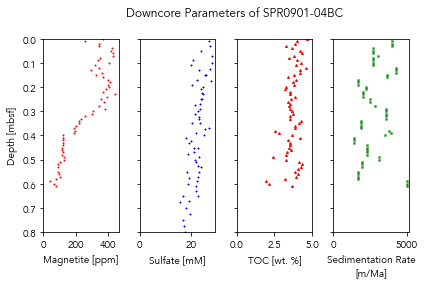

In [17]:
# plot downcore figures
colors = ["r", "b", "r", "g", "y", "k", "c"]
markers = [".", "+", "^", "x", ">", "<", "v"]
dc_fig, dc_axs = data_fns.plot_dc(["Magnetite [ppm]", "Sulfate [mM]", "TOC [wt. %]", "Sedimentation Rate [m/Ma]"], comb_df, colors, markers)
dc_axs[0].set_ylim(0.8, 0)
dc_axs[0].set_xticks([0, 200, 400])
dc_axs[2].set_xlim(0,5)
dc_fig.suptitle("Downcore Parameters of SPR0901-04BC", x=0.55)
dc_axs[3].set_xlabel("Sedimentation Rate\n[m/Ma]")
dc_fig.tight_layout()
dc_fig.savefig("outputs/wang2019/wang2019_dc_basic1.pdf", bbox_inches="tight")

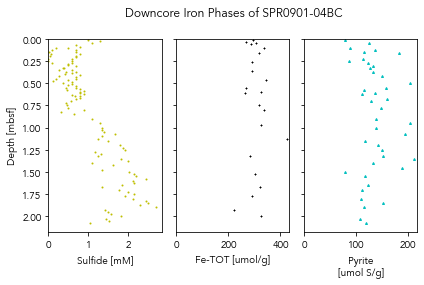

In [15]:
# plot just geochem
dc_fig, dc_axs = data_fns.plot_dc(["Sulfide [mM]", "Fe-TOT [umol/g]", "Pyrite [umol S/g]"], comb_df, ["y", "k", "c"], markers)
dc_fig.suptitle("Downcore Iron Phases of SPR0901-04BC", x=0.55)
#dc_axs[0].set_ylim(0.75, 0)
#dc_axs[0].set_xticks([0, 200, 400])
#dc_axs[3].set_xlabel("Sedimentation Rate\n[m/Ma]")
dc_axs[2].set_xlabel("Pyrite\n[umol S/g]")
dc_fig.tight_layout()
dc_fig.savefig("outputs/wang2019/wang2019_dc_ironspec.pdf", bbox_inches="tight")

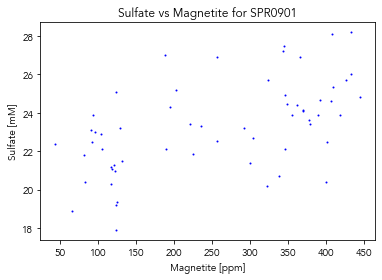

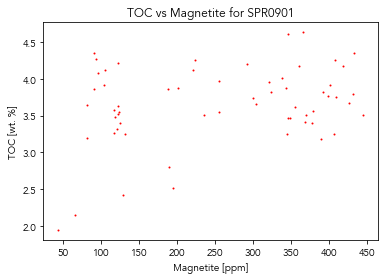

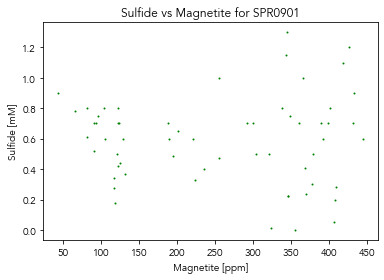

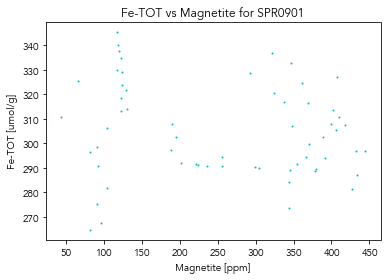

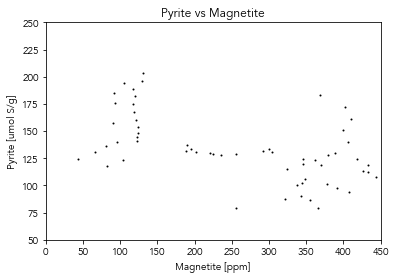

In [16]:
# plot comparison figures
comp_figs, comp_axs = data_fns.plot_comp(["Sulfate [mM]", "TOC [wt. %]", "Sulfide [mM]", "Fe-TOT [umol/g]", "Pyrite [umol S/g]"], interpolated, ["b", "r", "g", "c", "k", "y"], [".", ".", ".", ".", ".", "."])

# label and save these if you want
comp_axs[0].set(xlabel="Magnetite [ppm]", ylabel="Sulfate [mM]", title="Sulfate vs Magnetite for SPR0901")
comp_figs[0].savefig("outputs/wang2019/wang2019_sulfa-comp.pdf")

comp_axs[1].set(xlabel="Magnetite [ppm]", ylabel="TOC [wt. %]", title="TOC vs Magnetite for SPR0901")
comp_figs[1].savefig("outputs/wang2019/wang2019_toc-comp.pdf")

comp_axs[2].set(xlabel="Magnetite [ppm]", ylabel="Sulfide [mM]", title="Sulfide vs Magnetite for SPR0901")
comp_figs[2].savefig("outputs/wang2019/wang2019_sulfi-comp.pdf")

comp_axs[3].set(xlabel="Magnetite [ppm]", ylabel="Fe-TOT [umol/g]", title="Fe-TOT vs Magnetite for SPR0901")
comp_figs[3].savefig("outputs/wang2019/wang2019_fe-comp.pdf")

comp_axs[4].set(xlabel="Magnetite [ppm]", ylabel="Pyrite [umol S/g]", title="Pyrite vs Magnetite", xlim=[0,450], ylim=[50,250])
comp_figs[4].savefig("outputs/wang2019/wang2019_pyr-comp.pdf")

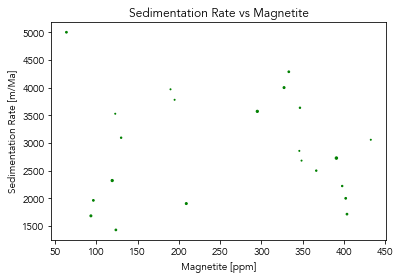

In [12]:
# sed rates
sed_fig, sed_ax, sed_sc = data_fns.sed_avg_plot(interpolated)
sed_ax.set(xlabel="Magnetite [ppm]", ylabel="Sedimentation Rate [m/Ma]", title = "Sedimentation Rate vs Magnetite")
#sed_fig.savefig("outputs/wang2019/wang2019_sed-comp.pdf")

In [30]:
# last thing to do is add the dataframes we used to the compilation excel doc
# put the raw and interpolated data in separate files
data_fns.write_output(interpolated, "SPR0901-04BC", "data/comp_inter.xlsx")
data_fns.write_output(comb_df, "SPR0901-04BC", "data/comp_raw.xlsx")